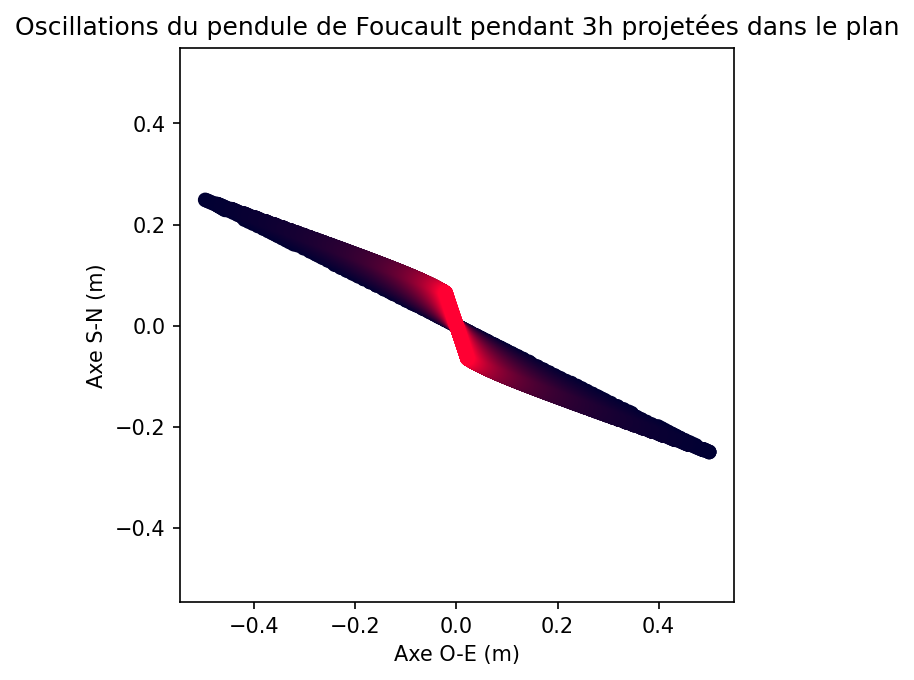

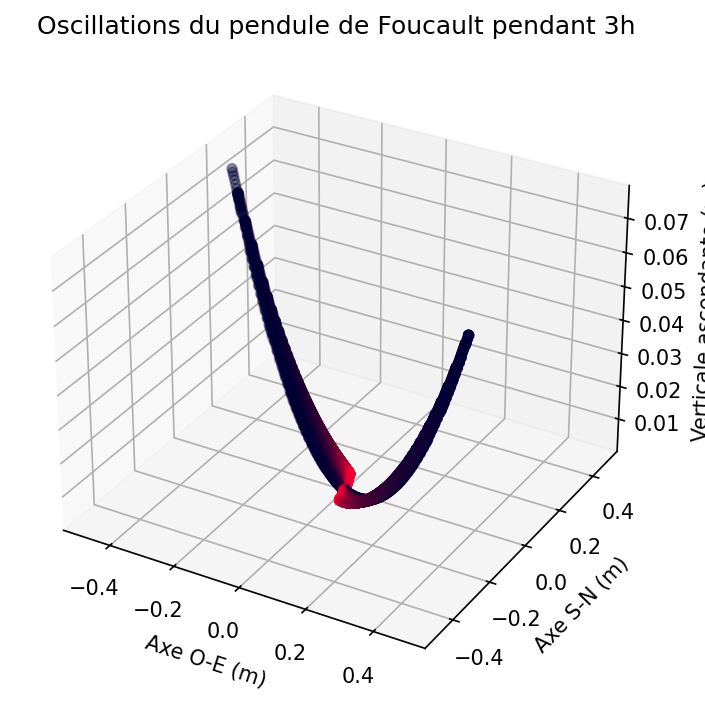

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150

l = 2.2
omega = 7.2921e-5
lamb = 43.6109/180*2*pi
Cx = 0.5
pi = 3.14159
d = 10e-2
pair = 1.18
m = 4
g=9.81
sigma = -1/4*Cx*pi*(d**2)*pair
T=m*g

temps = 3
step = 0.5

# Conditions initiales
x0 = 0.5
y0 = -0.25
ux0 = 0.0
uy0 = 0


# Système d'équations différentielles
def systeme(t, Y):
    x = Y[0]
    y = Y[1]
    ux = Y[2]
    uy = Y[3]

    dx_dt = ux
    dy_dt = uy
    
    dux_dt = -2*omega*(-uy*sin(lamb))+ux*sigma/m*sqrt(ux**2+uy**2)-T*x/(m*l)
    duy_dt = -2*omega*(ux*sin(lamb))+uy*sigma/m*sqrt(ux**2+uy**2)-T*y/(m*l)

    return [dx_dt, dy_dt, dux_dt, duy_dt]

# Résolution

solution = solve_ivp(systeme, [0, temps*3600], [x0, y0, ux0, uy0], method='RK45', max_step=step)

x=np.array(solution['y'][0])
y=np.array(solution['y'][1])
z = l -np.sqrt(l**2-x**2-y**2)

minimum = min(min(x), min(y))
maximum = max(max(x), max(y))
minimumz = min(z)
maximumz = max(z)

couleur = [(i/len(x), 0, 0.2) for i in range(len(x))]


# Aspect ratio 1:1
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# Plot en 2D
plt.title(f"Oscillations du pendule de Foucault pendant {temps}h projetées dans le plan")
plt.xlim(minimum*1.1,maximum*1.1)
plt.ylim(minimum*1.1,maximum*1.1)
plt.xlabel("Axe O-E (m)")
plt.ylabel("Axe S-N (m)")

ax.scatter(x,y, color=couleur)

plt.savefig(f"pff_{temps}_plan.png")
plt.show()

# Plot en 3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')  # Affichage en 3D
ax.scatter(x, y, z, c=couleur)
plt.title(f"Oscillations du pendule de Foucault pendant {temps}h")
ax.set_xlabel('Axe O-E (m)')
ax.set_ylabel('Axe S-N (m)')
ax.set_zlabel('Verticale ascendante (m)')
ax.set_xlim(minimum*1.1,maximum*1.1)
ax.set_ylim(minimum*1.1,maximum*1.1)
ax.set_zlim(minimumz*1.1,maximumz*1.1)
fig.tight_layout()
plt.savefig(f"pff_{temps}_3d.png")
plt.show()


    
